In [1]:
import requests
import matplotlib.pyplot as pp
import numpy as np
from matplotlib import cm

In [2]:
api_key = ''
base_url = 'http://api.waqi.info'
endpoint = '/map/bounds/'
lat1 = -39.368279
lon1 = 112.719727
lat2 = -10.574222
lon2 = 154.335938
r = requests.get("{}{}?latlng={},{},{},{}&token={}".format(base_url, endpoint, lat1, lon1, lat2, lon2, api_key))

In [3]:
data = r.json()['data']

In [4]:
data[0]

{'lat': -23.8571946,
 'lon': 151.2695779,
 'uid': 5122,
 'aqi': '26',
 'station': {'name': 'South Gladstone, Australia',
  'time': '2020-01-03T01:00:00+10:00'}}

In [5]:
lats = [d['lat'] for d in data]
lons = [d['lon'] for d in data]
aqis = [d['aqi'] for d in data]

In [6]:
aqis = [51 if item == '-' else item for item in aqis]

In [7]:
lats = np.array(lats, dtype=np.float64)
lons = np.array(lons, dtype=np.float64)
aqis = np.array(aqis, dtype=np.float64)

In [8]:
aqis /= np.max(np.abs(aqis),axis=0)

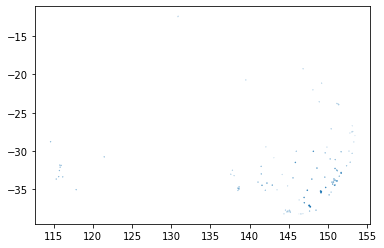

In [13]:
pp.scatter(lons, lats, aqis, cmap=cm.hot)